In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:
# Get the absolute path of the project root (one level up from 'notebooks')
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Construct the correct file path
file_path = os.path.join(project_root, "data", "processed_data.parquet")

# Load the file
df = pd.read_parquet(file_path)

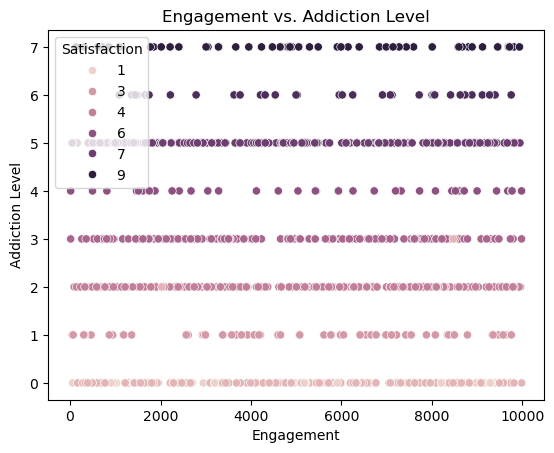

✅ Visualization saved at D:/SLTC/3Y Second Semester/Big Data/Group Project/big_data_project/data/visualizations/engagement_vs_addiction.png\engagement_vs_addiction.png


In [4]:
# Ensure the 'visualizations' directory exists
output_dir = "D:/SLTC/3Y Second Semester/Big Data/Group Project/big_data_project/data/visualizations/engagement_vs_addiction.png"
os.makedirs(output_dir, exist_ok=True)

# Visualization 1: Engagement vs. Addiction Level
sns.scatterplot(data=df, x="Engagement", y="Addiction Level", hue="Satisfaction")
plt.title("Engagement vs. Addiction Level")

# Save the plot to the directory
output_path = os.path.join(output_dir, "engagement_vs_addiction.png")
plt.savefig(output_path)
plt.show()

print(f"✅ Visualization saved at {output_path}")

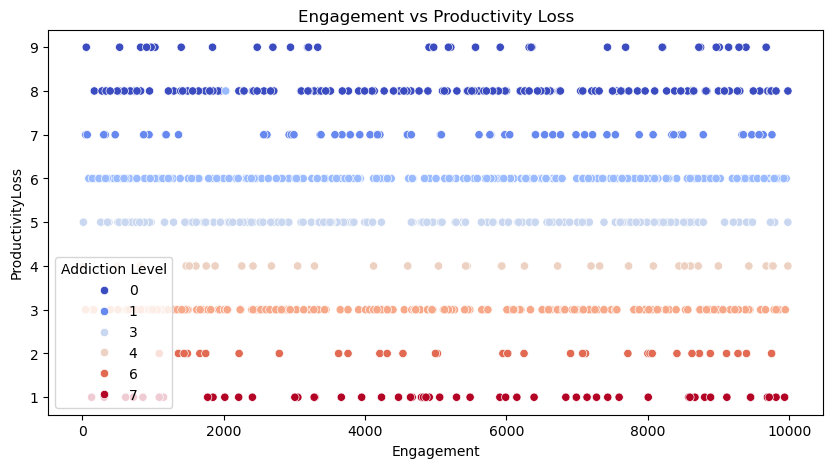

In [5]:
# Scatter Plot: Engagement vs Productivity Loss
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Engagement', y='ProductivityLoss', hue='Addiction Level', palette='coolwarm')
plt.title('Engagement vs Productivity Loss')
plt.savefig('../data/visualizations/engagement_vs_productivity.png')
plt.show()

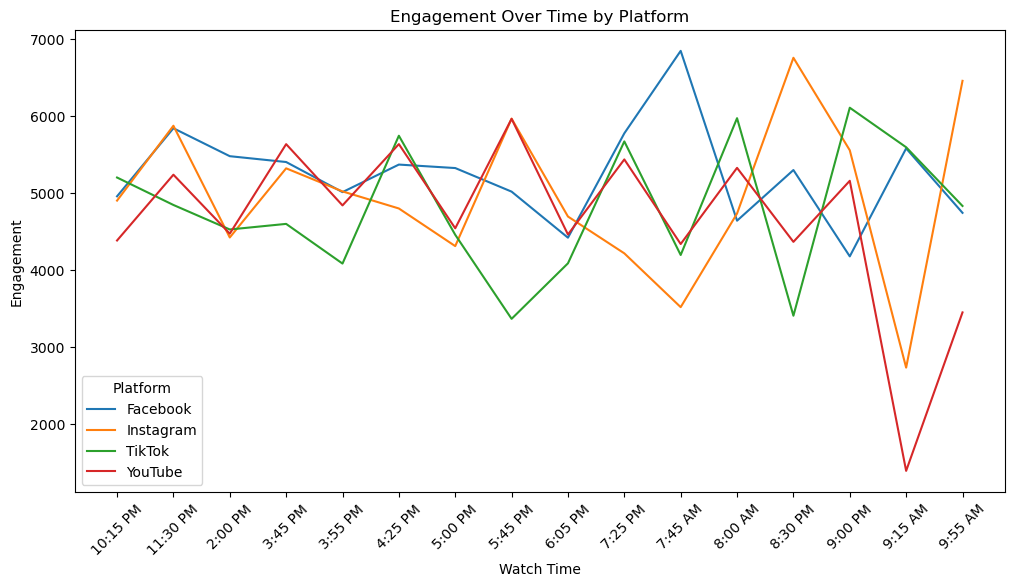

In [6]:
# Time-Series of Engagement by Platform
df_timeseries = df.groupby(['Watch Time', 'Platform'])['Engagement'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_timeseries, x='Watch Time', y='Engagement', hue='Platform')
plt.title('Engagement Over Time by Platform')
plt.xticks(rotation=45)
plt.savefig('../data/visualizations/engagement_by_platform.png')
plt.show()

<Figure size 1200x600 with 0 Axes>

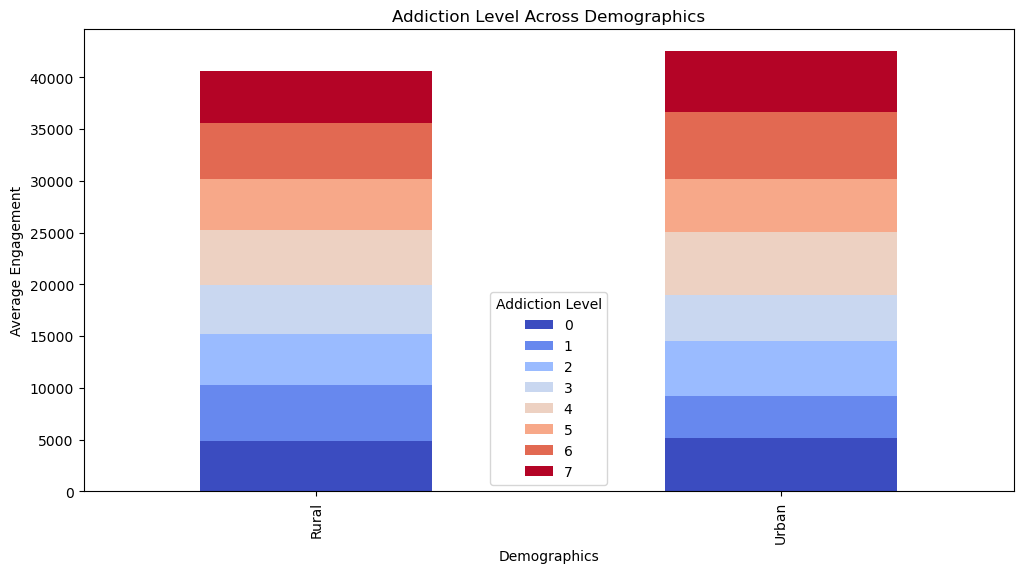

In [7]:
# Stacked Bar Chart: Addiction Level by Demographics
plt.figure(figsize=(12, 6))
df_pivot = df.pivot_table(index='Demographics', columns='Addiction Level', values='Engagement', aggfunc='mean')
df_pivot.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))
plt.title('Addiction Level Across Demographics')
plt.ylabel('Average Engagement')
plt.savefig('../data/visualizations/addiction_demographics.png')
plt.show()